In [1]:
%matplotlib inline
import random
import torch
#from mxnet import autograd, np, npx
#from d2l import mxnet as d2l
import numpy as np
#npx.set_np()
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = torch.tensor(4.2)
features, labels = synthetic_data(true_w, true_b, 1000)
def data_iter(batch_size, features, labels):#feature是x, lable是y,一次取10个
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
w = torch.normal(0, 0.01, (2, 1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad 
            param.grad.zero_()
            
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.requires_grad_=True
        l.mean().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(w,b)


tensor([[-1.9127, -0.7704],
        [ 1.2188, -0.0648],
        [ 0.9019, -2.0637],
        [-1.0666, -0.6226],
        [ 1.8359,  0.7377],
        [ 1.6750,  1.3572],
        [-1.7304,  0.1149],
        [ 0.3224,  2.3156],
        [ 1.3281, -1.4000],
        [-0.4482, -0.8089]]) 
 tensor([[ 2.9974],
        [ 6.8530],
        [13.0172],
        [ 4.1766],
        [ 5.3677],
        [ 2.9284],
        [ 0.3528],
        [-3.0232],
        [11.6053],
        [ 6.0499]])
tensor([[-2.2287, -0.4295],
        [ 0.7461, -0.0795],
        [ 1.0165,  0.8932],
        [ 0.7927, -0.7638],
        [-1.2800,  0.8757],
        [ 0.7691, -1.6142],
        [ 0.3799, -0.4446],
        [ 0.2984,  0.2500],
        [ 1.9047, -0.4154],
        [-0.3626, -0.2116]]) 
 tensor([[ 1.2011],
        [ 5.9732],
        [ 3.1922],
        [ 8.3933],
        [-1.3345],
        [11.2229],
        [ 6.4528],
        [ 3.9415],
        [ 9.4165],
        [ 4.1931]])
tensor([[-0.6870, -0.9030],
        [ 1.0812,  0.371

In [2]:
import random
import torch 
epochs=3
w_true=torch.tensor([-2500,2.9])
b_true=torch.tensor(1.75)
x=torch.normal(4,3,(1000,2))
def line_reg(w,b,x):
    y=torch.matmul(x,w.reshape(-1,1))+b
    y+=torch.normal(0,0.01,y.shape)
    return y
y=line_reg(w_true,b_true,x)
w=torch.zeros_like(w_true,requires_grad=True)
b=torch.zeros_like(b_true,requires_grad=True)
batch_size=10
epochs=101
learnrate=0.003
def data_iterature(batch_size,input_x,input_y):#每次随机抽10个
    num_examples = len(input_x)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:i + batch_size]  # 直接按 batch_size 切分
        yield input_x[batch_indices], input_y[batch_indices]  # 使用 yield 生成批次
print(data_iterature(batch_size,x,y))
def sgd(params,lr):
    with torch.no_grad():#参数更新时使用，以免引入不必要的计算
       for param in params:
            param -= lr * param.grad
            param.grad.zero_()
def loss(y1,y2):
    return (y1-y2)**2
for epoch in range(epochs):
    for input_x,input_y in data_iterature(batch_size,x,y):
        y_pred=torch.matmul(input_x,w.reshape(-1,1))+b
        l=loss(y_pred,input_y).mean()
        print(l)
        l.backward()
        sgd([w,b],learnrate)
    with torch.no_grad():
            train_l = loss(torch.matmul(w,x.reshape(2,1000))+b, y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print([w,b])

<generator object data_iterature at 0x000001769D6DF940>
tensor(1.1637e+08, grad_fn=<MeanBackward0>)
tensor(51709352., grad_fn=<MeanBackward0>)
tensor(49281024., grad_fn=<MeanBackward0>)
tensor(35669144., grad_fn=<MeanBackward0>)
tensor(55390656., grad_fn=<MeanBackward0>)
tensor(38497640., grad_fn=<MeanBackward0>)
tensor(34732952., grad_fn=<MeanBackward0>)
tensor(26962516., grad_fn=<MeanBackward0>)
tensor(5478034.5000, grad_fn=<MeanBackward0>)
tensor(8918531., grad_fn=<MeanBackward0>)
tensor(24559610., grad_fn=<MeanBackward0>)
tensor(17219996., grad_fn=<MeanBackward0>)
tensor(8855556., grad_fn=<MeanBackward0>)
tensor(2863281.7500, grad_fn=<MeanBackward0>)
tensor(5219237., grad_fn=<MeanBackward0>)
tensor(4941935., grad_fn=<MeanBackward0>)
tensor(6381451., grad_fn=<MeanBackward0>)
tensor(14417371., grad_fn=<MeanBackward0>)
tensor(1835405.3750, grad_fn=<MeanBackward0>)
tensor(5635741.5000, grad_fn=<MeanBackward0>)
tensor(2661564.5000, grad_fn=<MeanBackward0>)
tensor(3299136.7500, grad_fn=<

In [3]:
import numpy as np
import torch
from torch import nn
#from torch.utils import data
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features=torch.normal(0,1,(1000,2))
labels=torch.matmul(features,true_w.reshape(2,1))+true_b
#print(labels)
# labels=labels.squeeze()
# print(labels)
def load_array(data_arrays, batch_size): #@save
    """构造一个PyTorch数据迭代器"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
iterator=iter(data_iter)
# for batch in data_iter:
#     print(batch)
net=torch.nn.Sequential(torch.nn.Linear(2,1))
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)
loss=nn.MSELoss()
trainer=torch.optim.SGD(net.parameters(),lr=0.01)
epochs=100

for epoch in range(epochs):
    for x,y in data_iter:
        trainer.zero_grad()
        l=loss(net(x),y)
        l.backward()
        trainer.step()
    with torch.no_grad():
        l=loss(net(features),labels)
        print(f'epoch {epoch + 1}, loss {l:f}')
print(net[0].weight,net[0].bias)

epoch 1, loss 0.502733
epoch 2, loss 0.007760
epoch 3, loss 0.000120
epoch 4, loss 0.000002
epoch 5, loss 0.000000
epoch 6, loss 0.000000
epoch 7, loss 0.000000
epoch 8, loss 0.000000
epoch 9, loss 0.000000
epoch 10, loss 0.000000
epoch 11, loss 0.000000
epoch 12, loss 0.000000
epoch 13, loss 0.000000
epoch 14, loss 0.000000
epoch 15, loss 0.000000
epoch 16, loss 0.000000
epoch 17, loss 0.000000
epoch 18, loss 0.000000
epoch 19, loss 0.000000
epoch 20, loss 0.000000
epoch 21, loss 0.000000
epoch 22, loss 0.000000
epoch 23, loss 0.000000
epoch 24, loss 0.000000
epoch 25, loss 0.000000
epoch 26, loss 0.000000
epoch 27, loss 0.000000
epoch 28, loss 0.000000
epoch 29, loss 0.000000
epoch 30, loss 0.000000
epoch 31, loss 0.000000
epoch 32, loss 0.000000
epoch 33, loss 0.000000
epoch 34, loss 0.000000
epoch 35, loss 0.000000
epoch 36, loss 0.000000
epoch 37, loss 0.000000
epoch 38, loss 0.000000
epoch 39, loss 0.000000
epoch 40, loss 0.000000
epoch 41, loss 0.000000
epoch 42, loss 0.000000
e

torch.DoubleTensor


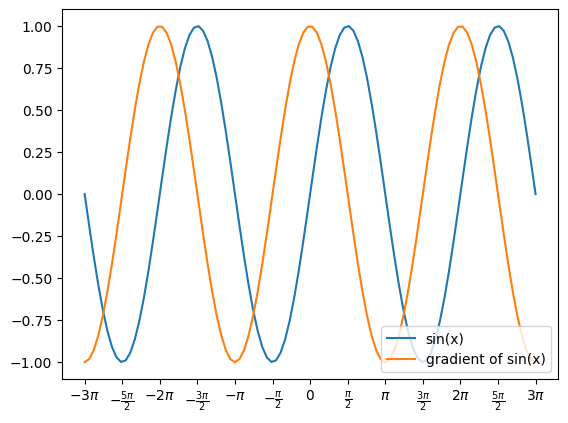

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import torch
# def pi_half_formatter(val, pos):
#     # 计算 π 的半整数倍系数
#     coeff = val / (np.pi / 2)
#     coeff = int(round(coeff))
#     sign = '-' if coeff < 0 else ''  # 手动处理符号
#     # 如果系数是整数或者非常接近整数（考虑浮点数精度），则显示该整数倍的 π/2
#     if coeff % 2 == 0:
 
#         if coeff==0:
#             return '0'
#         elif abs(coeff) == 2:
#             return fr'${sign}\pi$'          # 显示 π 而不是 1π
#         else:
#             return fr'${sign}{abs(coeff)//2}\pi$' # 2π, 3π...
#     else:
#         if coeff == 1:
#             return fr'${sign}\frac{{\pi}}{{2}}$'  # π/2
#         else:
#             return fr'${sign}\frac{{{abs(coeff)}\pi}}{{2}}$'  # 3
def pi_half_formatter(val, pos):
    """ 将数值格式化为 π/2 的倍数 """
    unit = np.pi / 2
    coeff = val / unit  # 计算系数
    
    # 浮点精度处理：判断是否接近整数
    if not np.isclose(coeff, round(coeff), atol=1e-9):
        return ''  # 非整数倍时返回空字符串
    
    coeff = int(round(coeff))
    sign = '-' if coeff < 0 else ''  # 手动处理符号
    abs_coeff = abs(coeff)
    
    # 生成LaTeX标签
    if abs_coeff == 0:
        return r'$0$'
    elif abs_coeff % 2 == 0:
        multiple = abs_coeff // 2
        if multiple == 1:
            return fr'${sign}\pi$'
        else:
            return fr'${sign}{multiple}\pi$'
    else:
        if abs_coeff == 1:
            return fr'${sign}\frac{{\pi}}{{2}}$'
        else:
            return fr'${sign}\frac{{{abs_coeff}\pi}}{{2}}$'
f,ax=plt.subplots(1)
x = np.linspace(-3*np.pi, 3*np.pi, 100)
x1= torch.tensor(x, requires_grad=True)
y1= torch.sin(x1)
y1.backward(torch.ones_like(x1))
print(x1.grad.type())
ax.plot(x,np.sin(x),label='sin(x)')
ax.plot(x,x1.grad,label="gradient of sin(x)")
ax.legend(loc='lower right', shadow=False)

ax.xaxis.set_major_formatter(FuncFormatter(pi_half_formatter))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2))

plt.show()




In [5]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=12)
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root=r"C:\Users\Lenovo\Desktop\visiondata", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root=r"C:\Users\Lenovo\Desktop\visiondata", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=12),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=12))
train_iter, test_iter = load_data_fashion_mnist(32)
# for X, y in train_iter:
#     print(X.shape, X.dtype, y.shape, y.dtype)
#     show_images(X, 2, 8, titles=get_fashion_mnist_labels(y))
#     break
    